># Universidad Autónoma de Aguascalientes
>## *Ingeniería en Computación Inteligente*
>#### Materia:
>Inteligencia Artificial
>#### Topico: 
>Búsqueda no Informada: _A*_
>#### Integrantes del Equipo:
>- Juan Francisco Gallo Ramírez
>- José Alfredo Díaz Robledo
>- Luis Palbo Esparza Terrones
>- Luis Manuel Flores Jiménez 
>#### Maestro: 
>Dr. Francisco Javier Luna Rosas
>#### Fecha: 
>Noviembre del 2023

# A*

- Importamos las librerías necesarias.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

- Creamos nuesttro grafo.

In [2]:
G = nx.Graph()

- Añadimos todos nuestros nodos, en este caso representan ciudades de EUA.

In [3]:
G.add_node("IFalls");
G.add_node("GForks");
G.add_node("Bemindji");
G.add_node("Duluth");
G.add_node("Fargo");
G.add_node("StCloud");
G.add_node("Minneapolis");
G.add_node("Wausau");
G.add_node("GBay");
G.add_node("LCrosse");
G.add_node("Rochester");
G.add_node("SFalls");
G.add_node("Madison");
G.add_node("Milwaukee");
G.add_node("Dubuque");
G.add_node("Rockford");
G.add_node("Chicago");

- Añadimos todas las aristas de los nodos.

In [4]:
G.add_edge("IFalls", "GForks", weight=80)
G.add_edge("IFalls", "Bemindji", weight=60)
G.add_edge("IFalls", "Duluth", weight=65)
G.add_edge("GForks", "Bemindji", weight=70)
G.add_edge("GForks", "Fargo", weight=50)
G.add_edge("Bemindji", "Duluth", weight=55)
G.add_edge("Bemindji", "StCloud", weight=65)
G.add_edge("Duluth", "Minneapolis", weight=70)
G.add_edge("Fargo", "StCloud", weight=78)
G.add_edge("Fargo", "SFalls", weight=130)
G.add_edge("StCloud", "Minneapolis", weight=30)
G.add_edge("Minneapolis", "Wausau", weight=75)
G.add_edge("Minneapolis", "LCrosse", weight=70)
G.add_edge("Minneapolis", "Rochester", weight=68)
G.add_edge("Wausau", "GBay", weight=60)
G.add_edge("GBay", "LCrosse", weight=72)
G.add_edge("GBay", "Milwaukee", weight=70)
G.add_edge("LCrosse", "Rochester", weight=20)
G.add_edge("LCrosse", "Madison", weight=35)
G.add_edge("LCrosse", "Dubuque", weight=38)
G.add_edge("Rochester", "SFalls", weight=125)
G.add_edge("Rochester", "Dubuque", weight=40)
G.add_edge("Madison", "Milwaukee", weight=37)
G.add_edge("Madison", "Rockford", weight=35)
G.add_edge("Dubuque", "Rockford", weight=38)
G.add_edge("Milwaukee", "Chicago", weight=37)
G.add_edge("Rockford", "Chicago", weight=33)

- Imprimimos el grafo.

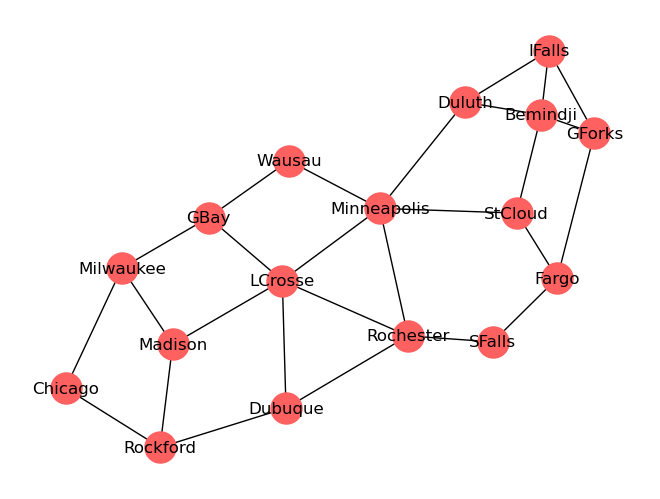

In [5]:
nx.draw(G, with_labels=True, node_size=500, node_color="#FF6060", font_size=12, font_color="black")
plt.show()

- Función para la búsqueda A*.

In [6]:
# Función para calcular el costo total de una ruta
def calculate_cost(route, graph):
    cost = 0
    for i in range(len(route) - 1):
        cost += graph[route[i]][route[i + 1]]["weight"]
    return cost

# Algoritmo de A*
def a_star_search(graph, initial_node, destination_node):
    open_set = [(0, [initial_node])]  # Inicializa el conjunto abierto con el costo y la ruta actual
    closed_set = set()  # Conjunto para llevar un registro de los nodos visitados

    while open_set:
        cost, current_route = heapq.heappop(open_set)  # Extrae la ruta con el menor costo del conjunto abierto
        current_node = current_route[-1]  # Obtiene el nodo actual

        if current_node == destination_node:  # Si llegamos al nodo de destino, devuelve la ruta
            return current_route, cost

        if current_node not in closed_set:
            closed_set.add(current_node)
            neighbors = list(graph.neighbors(current_node))

            for neighbor in neighbors:
                if neighbor not in current_route:
                    new_route = current_route + [neighbor]  # Extiende la ruta con el vecino
                    g_cost = calculate_cost(new_route, graph)  # Costo acumulado desde el nodo inicial hasta el vecino
                    h_cost = calculate_cost([neighbor], graph)  # Costo heurístico desde el vecino hasta el destino
                    f_cost = g_cost + h_cost  # Costo total estimado (g_cost + h_cost)
                    heapq.heappush(open_set, (f_cost, new_route))  # Agrega la nueva ruta al conjunto abierto

    return None  # Si no se encuentra una ruta, devuelve None

- Recorremos el grafo desde "Rochester" hasta "Chicago".

In [7]:
initial_node = "IFalls"
destination_node = "Chicago"
best_route, best_cost = a_star_search(G, initial_node, destination_node)

- Imprimimos los resultados.

In [8]:
if best_route:
    print(">> Mejor ruta:\n")
    print(best_route)
    print("\n>> Costo de la mejor ruta:\n")
    print(best_cost)
else:
    print(">> No se encontró una ruta desde {} a {}.".format(initial_node, destination_node))

>> Mejor ruta:

['IFalls', 'Duluth', 'Minneapolis', 'LCrosse', 'Madison', 'Rockford', 'Chicago']

>> Costo de la mejor ruta:

308
